<a href="https://colab.research.google.com/github/disinikk/20PWEB-C/blob/master/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyLDAvis
!pip install gensim==4.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.0 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# Importing modules
import pandas as pd
import os
os.chdir('..')
# Read data into papers
papers = pd.read_csv('./content/data/cleaner.csv')
# Print head
papers.head()

,link,tweet,tweet_preprocessed
0,https://twitter.com/Rudi_1192nd/status/1597742...,@oldskul81 @TerracotaJ @Dennysiregar7 biasalah...,biasalah kadrun berbekal tulisan diyakini fakta
1,https://twitter.com/rizalyose1980/status/15977...,@BleggoD @korantempo Otak kau cma sampai kadru...,otak kamu cma kadrun doang cebong nyampe urgen...
2,https://twitter.com/DenBagus123789/status/1597...,"@syxxmaster Malah bisa awet muda teman, spy se...",bahkan awet muda teman selalu ketawa melihat k...
3,https://twitter.com/NKRI_blessed/status/159774...,@keuangannews_id Media kadrun Bacanya kita bal...,media kadrun bacanya balik jokowi tertipu pena...
4,https://twitter.com/Dhover_10/status/159774193...,@pengarang_sajak Orang model begini kalau yg p...,orang model begini kalau profesional pemerinta...


In [ ]:
# Remove the columns
papers = papers.drop(columns=['link', 'tweet'], axis=1)
# Print out the first rows of papers
papers.head()

,tweet_preprocessed
0,biasalah kadrun berbekal tulisan diyakini fakta
1,otak kamu cma kadrun doang cebong nyampe urgen...
2,bahkan awet muda teman selalu ketawa melihat k...
3,media kadrun bacanya balik jokowi tertipu pena...
4,orang model begini kalau profesional pemerinta...


In [ ]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['tweet_preprocessed'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

0      biasalah kadrun berbekal tulisan diyakini fakta
1    otak kamu cma kadrun doang cebong nyampe urgen...
2    bahkan awet muda teman selalu ketawa melihat k...
3    media kadrun bacanya balik jokowi tertipu pena...
4    orang model begini kalau profesional pemerinta...
Name: paper_text_processed, dtype: object

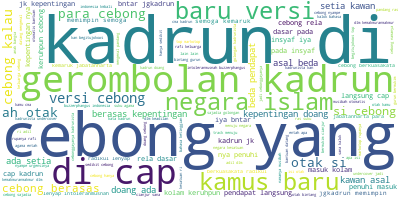

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
stop_words = ['iya','yang','cobain','gini','sedang','top',
'indonesia part','ngakak','bikin','random','free','bijak','gila','indonesia','part','the','terbaru',
'ini','kalian','auto','belakang','jadi','sendiri','bisa','ketemu','anjing','mimpi','toilet', 'coba', 'gelojoh', 'travelling', 'bengaluruh', 'from', 'sleman', 'bupati',
 'angkasa pura', 'mandatory', 'bengaluru', 'loops', 'gaiter', 'balaclava', 'mertua', 'di', 'kini',
'mamuju', 'kita','sobat', 'makmur', 'jaya', 'pratama', 'bintaro', 'panjang', 'umum', 'mantap', 'laksana', 'boleh',
 'harus', 'kamu', 'hanya', 'tak', 'tahu',  'bagaimana', 'gentar', 'bagai', 'ini', 'malaysia', 'per', 'tiap',
 'jak', 'para', 'lah', 'bagai', 'dengan', 'pagi', 'semua','lama', 'kalau', 'akun', 'banget', 'baik', 'mau', 'suka', 'apa', 'sama', 'aja', 'gak', 'ngab', 'mancity', 'chelsea',
 'aku', 'hari', 'mah', 'yuk', 'diam', 'bareng', 'say', 'kaum', 'porno', 'ratu', 'haha', 'orang', 'banyak', 'kebanyakan', 'ios', 'nya', 'sih', 'smp', 'jangan'
 , 'buat', 'jadinya','mulu', 'lihat', 'lebih', 'ibu', 'langsung', 'pengen', 'kan', 'mana', 'bukan', 'jam', 'kirim', 'anak', 'deh', 'biar', 'dong', 'ada'
 , 'tidak', 'lagi', 'kok', 'isinya', 'melulu', 'bahkan', 'cari', 'saya', 'sendiri', 'teman', 'kak', 'tuh', 'pernah', 'bagian', 'otak', 'emang', 'terus', 'punya'
]

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['biasalah', 'kadrun', 'berbekal', 'tulisan', 'diyakini', 'fakta']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.130*"cebong" + 0.012*"kadrunista" + 0.009*"asal" + 0.008*"isi" + '
  '0.008*"ketinggian" + 0.008*"bahasa" + 0.008*"kalok" + 0.008*"nyonyor" + '
  '0.008*"kesampluk" + 0.008*"cocot"'),
 (1,
  '0.053*"cebong" + 0.052*"kadrun" + 0.011*"penyembah" + 0.010*"jemuran" + '
  '0.010*"kolor" + 0.010*"tiang" + 0.009*"teriak" + 0.009*"awet" + '
  '0.009*"sakit" + 0.009*"muda"'),
 (2,
  '0.108*"cebong" + 0.038*"kadrun" + 0.014*"presiden" + 0.014*"kepentingan" + '
  '0.011*"anies" + 0.010*"ikn" + 0.009*"doang" + 0.008*"si" + 0.008*"beda" + '
  '0.008*"ah"'),
 (3,
  '0.100*"kadrun" + 0.039*"cebong" + 0.014*"jokowi" + 0.012*"siapa" + '
  '0.010*"cap" + 0.010*"seiman" + 0.009*"lain" + 0.009*"gerombolan" + '
  '0.009*"oposisi" + 0.008*"mulut"'),
 (4,
  '0.044*"cebong" + 0.036*"kadrun" + 0.022*"mikir" + 0.018*"islam" + '
  '0.018*"negara" + 0.017*"doang" + 0.012*"agama" + 0.012*"cuma" + '
  '0.011*"kritis" + 0.011*"pakai"'),
 (5,
  '0.038*"cebong" + 0.021*"dlm" + 0.015*"kadrun" + 0.012*"semoga"

In [ ]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./content/data/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './content/data/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.072292 -0.090760       1        1  16.441906
9      0.011943  0.227364       2        1  11.991108
1      0.004635 -0.052771       3        1  11.975489
3      0.145443  0.101780       4        1  10.417274
8      0.089226 -0.108407       5        1  10.136254
6     -0.214389 -0.027673       6        1  10.098822
0     -0.061775 -0.170740       7        1   8.930573
4      0.100469 -0.038971       8        1   8.189565
7      0.064116  0.073699       9        1   6.105770
5     -0.211960  0.086480      10        1   5.713238, topic_info=       Term         Freq        Total Category  logprob  loglift
4    kadrun   630.000000   630.000000  Default  30.0000  30.0000
122   bebas    76.000000    76.000000  Default  29.0000  29.0000
6    cebong  1023.000000  1023.000000  Default  28.0000  28.0000
216     dlm    61.000000    61.000000  Default  27.0000  27.0000
67   negara   116.000000   116.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
46   rakyat     8.466462    42.768610  Topic10  -4.6567   1.2427
6    cebong    34.087430  1023.906299  Topic10  -3.2638  -0.5401
22   jokowi     8.467605    45.046400  Topic10  -4.6565   1.1909
4    kadrun    13.575576   630.374846  Topic10  -4.1845  -0.9757
67   negara     9.466264   116.142722  Topic10  -4.5450   0.3553

[650 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
126       8  0.690846         aceh
126       9  0.251217         aceh
1160      8  0.629055     adadasar
1161      8  0.629037        adadi
692       9  0.814734  adalahsemua
...     ...       ...          ...
312       7  0.387748        woiii
1173      8  0.629025         yadi
1324     10  0.428123       yahudi
785      10  0.658876   yakmakanya
534       1  0.843252        zenit

[1607 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 2, 4, 9, 7, 1, 5, 8, 6])